# Importing dependencis

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask=os.listdir(r'C:\Users\kunal\Downloads\archive\data\with_mask')

In [7]:
print(with_mask[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [8]:
without_mask=os.listdir(r'C:\Users\kunal\Downloads\archive\data\without_mask')

In [9]:
print(without_mask[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [10]:
len(with_mask)

3725

In [11]:
len(without_mask)

3828

# Creating Label

In [13]:
# with mask label is 1
# without mask label is 0

In [14]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [15]:
print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [16]:
labels=with_mask_labels+without_mask_labels

In [17]:
labels[-5:]

[0, 0, 0, 0, 0]

In [18]:
labels[0:5]

[1, 1, 1, 1, 1]

In [19]:
#displaying images

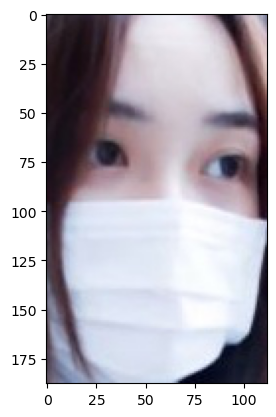

In [20]:
img=mpimg.imread(r'C:\Users\kunal\Downloads\archive\data\with_mask\with_mask_12.jpg')
imgplot=plt.imshow(img)
plt.show()

# Image processing

In [22]:
#resizing
#convert images into numpy arrays

In [23]:
with_mask_path='C:/Users/kunal/Downloads/archive/data/with_mask/'
data=[]
for img_file in with_mask:
    image=Image.open(with_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)



C:\Users\kunal\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
without_mask_path='C:/Users/kunal/Downloads/archive/data/without_mask/'
for img_file in without_mask:
    image=Image.open(without_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [25]:
len(data)

7553

In [26]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [27]:
# convertin image list i.e label and data list in array

In [28]:
X=np.array(data)
y=np.array(labels)

In [29]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


# Train test split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
print(X_train.shape)
print(X_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)


# Scaling data

In [34]:
X_train[0]

array([[[225, 235, 198],
        [210, 216, 186],
        [189, 188, 169],
        ...,
        [187, 182, 165],
        [181, 174, 151],
        [165, 182, 133]],

       [[224, 228, 217],
        [202, 204, 195],
        [201, 199, 193],
        ...,
        [198, 190, 180],
        [177, 169, 154],
        [158, 182, 141]],

       [[205, 204, 214],
        [221, 219, 227],
        [195, 191, 197],
        ...,
        [183, 173, 174],
        [174, 165, 160],
        [174, 203, 166]],

       ...,

       [[155, 176, 199],
        [160, 180, 197],
        [165, 185, 195],
        ...,
        [ 88,  99,  71],
        [106, 113,  85],
        [ 99, 104,  63]],

       [[150, 177, 197],
        [168, 190, 208],
        [174, 192, 209],
        ...,
        [106, 113,  81],
        [ 99, 103,  67],
        [ 99,  99,  33]],

       [[160, 193, 210],
        [177, 198, 221],
        [175, 189, 214],
        ...,
        [103, 107,  70],
        [ 77,  81,  47],
        [ 99,  94,  63]]

In [35]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [36]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

# Building Neural Network

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes=2

In [41]:
model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_of_classes,activation='sigmoid')
])

C:\Users\kunal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling model


In [44]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [45]:
# training


In [46]:
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 54s 278ms/step - acc: 0.7059 - loss: 0.6454 - val_acc: 0.8893 - val_loss: 0.2965
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 47s 278ms/step - acc: 0.8803 - loss: 0.3102 - val_acc: 0.8942 - val_loss: 0.2535
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 47s 278ms/step - acc: 0.8943 - loss: 0.2696 - val_acc: 0.8942 - val_loss: 0.2754
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 48s 280ms/step - acc: 0.9057 - loss: 0.2346 - val_acc: 0.9223 - val_loss: 0.2314
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 48s 282ms/step - acc: 0.9295 - loss: 0.1918 - val_acc: 0.9322 - val_loss: 0.2096


In [47]:
#model evaluation

In [48]:
loss,accuracy=model.evaluate(X_train_scaled,y_train)

189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - acc: 0.9514 - loss: 0.1198


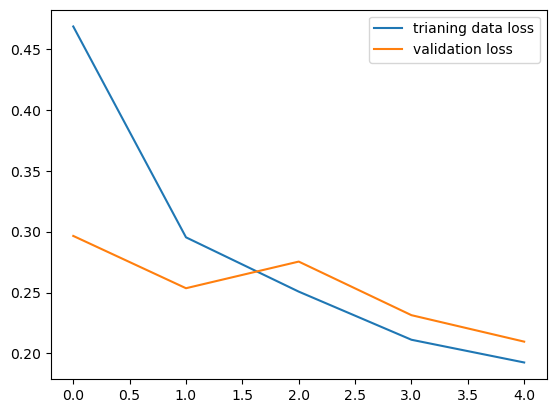

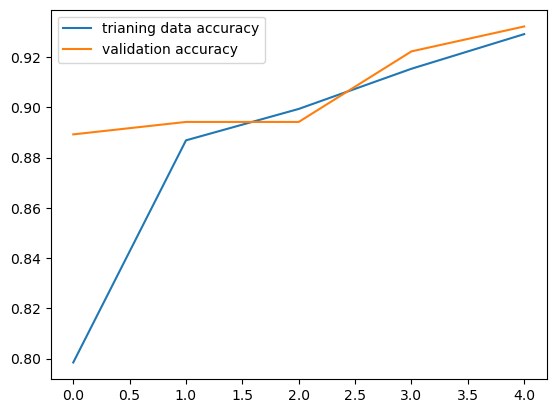

In [49]:
h=history

plt.plot(h.history['loss'],label='trianing data loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

# for accurcay

h=history

plt.plot(h.history['acc'],label='trianing data accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()


Path of image to be predicted:  C:\Users\kunal\Downloads\archive\data\without_mask\without_mask_6.jpg


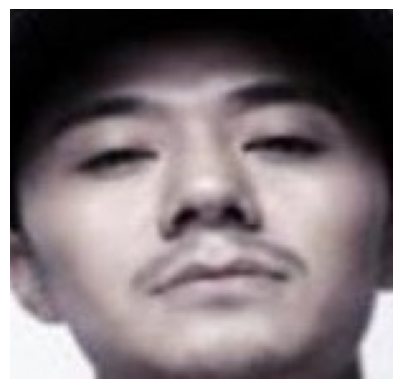

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Person is not wearing a mask.


In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

input_image_path = input("Path of image to be predicted: ")

input_image = cv2.imread(input_image_path)
if input_image is None:
    print("Error: Unable to read the image. Please check the path and try again.")
    exit()

# Display the input image
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  
plt.axis('off')
plt.show()

# Preprocess the image
input_image_resized = cv2.resize(input_image, (128, 128))  
input_image_scaled = input_image_resized / 255.0  
input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))  

# Make prediction
input_prediction = model.predict(input_image_reshaped)

# Get the predicted label
input_prediction_label = np.argmax(input_prediction)  # Select the class with the highest probability

# Print prediction results
if input_prediction_label == 1:
    print("Person is wearing a mask.")
else:
    print("Person is not wearing a mask.")


"\ninput_image_path=input('path of image to be predicted')\n\ninput_image=cv2.imread(input_image_path)\nplt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct display\nplt.show()\ninput_image_resized=cv2.resize(input_image,(128,128))\n\ninput_image_scaled=input_image_resized/255\n\ninput_imaged_reshaped=np.reshape(input_image_scaled,[1,128,128,3])\n\ninput_prediction=model.predict(input_imaged_reshaped)\n\ninput_prediction_label=np.argmax(input_prediction)\n\nprint(input_prediction_label)\n\nif input_prediction_label==1:\n    print('Person is wearing mask')\nelse:\n    \n    print('Person is not wearing mask')\n\n"

In [53]:

model.save('face_mask.h5')


In [73]:

# C:\Users\kunal\Downloads\archive\data\without_mask\without_mask_6.jpg
# C:\Users\kunal\Downloads\archive\data\with_mask\with_mask_75.jpg